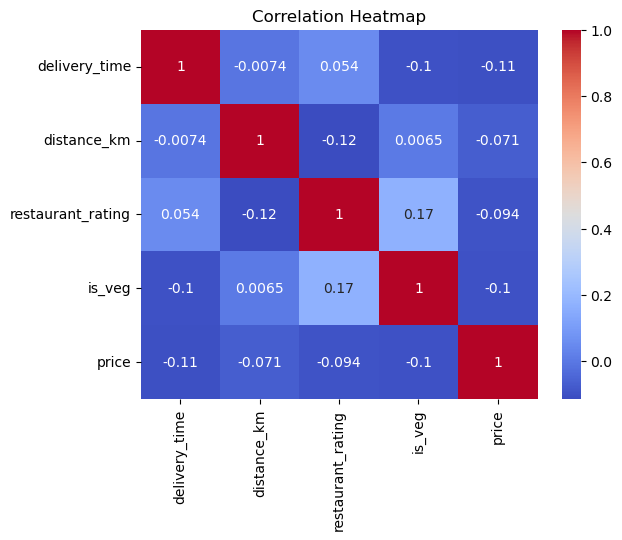

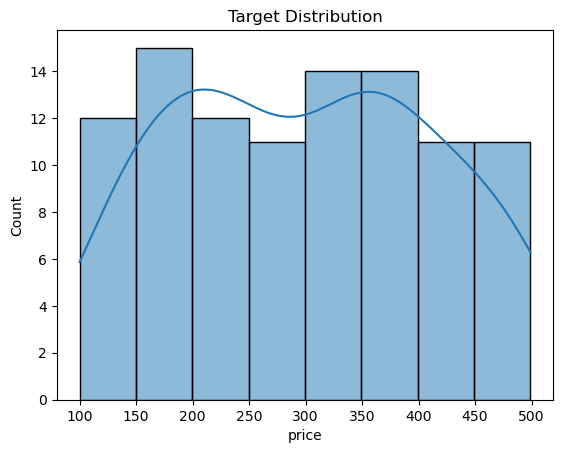

MSE: 10302.35, MAE: 86.44


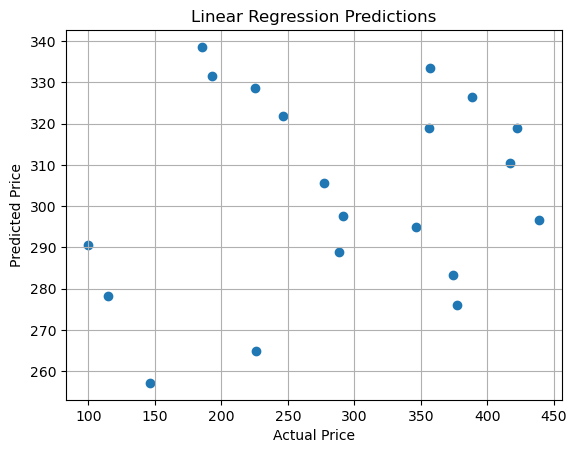

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


#  Create Sample Dataset

def create_sample_data():
    np.random.seed(42)
    size = 100
    df = pd.DataFrame({
        'delivery_time': np.random.randint(20, 60, size),
        'distance_km': np.round(np.random.uniform(1, 10, size), 2),
        'restaurant_rating': np.random.randint(3, 6, size),
        'is_veg': np.random.choice([0, 1], size),
        'price': np.random.randint(100, 500, size)
    })
    # Introduce some missing values
    df.loc[::10, 'restaurant_rating'] = np.nan
    return df

#  Preprocessing

def preprocess(df, target):
    X = df.drop(columns=[target])
    y = df[target]

    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Visualizations

def visualize(df, target):
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

    sns.histplot(df[target], kde=True)
    plt.title("Target Distribution")
    plt.show()


#  Train & Evaluate

def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    print(f"MSE: {mse:.2f}, MAE: {mae:.2f}")

    plt.scatter(y_test, preds)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Linear Regression Predictions")
    plt.grid(True)
    plt.show()

#  Run Pipeline

def run_pipeline():
    df = create_sample_data()
    target = 'price'
    visualize(df, target)
    X_train, X_test, y_train, y_test = preprocess(df, target)
    train_and_evaluate(X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    run_pipeline()


In [10]:
df = pd.read_csv("swiggy_cleaned.csv")
print("Available columns:\n", df.columns.tolist())


Available columns:
 ['rider_id', 'age', 'ratings', 'restaurant_latitude', 'restaurant_longitude', 'delivery_latitude', 'delivery_longitude', 'order_date', 'weather', 'traffic', 'vehicle_condition', 'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival', 'city_type', 'time_taken', 'city_name', 'order_day', 'order_month', 'order_day_of_week', 'is_weekend', 'pickup_time_minutes', 'order_time_hour', 'order_time_of_day', 'distance']


In [29]:
df.head()  #First 5 rows

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138


In [30]:
df.tail()  #Last 5 rows

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,16,CHEN,11,3,friday,0,15.0,23.0,night,4.657195
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393
45501,RANCHIRES09DEL02,23.0,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,fog,medium,...,36,RANCHI,2,3,wednesday,0,5.0,17.0,evening,12.074396


In [31]:
df.shape

(45502, 26)

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43648.0,29.555008,5.761482,20.000000,25.000000,30.000000,35.000000,39.000000
ratings,43594.0,4.635287,0.313827,2.500000,4.500000,4.700000,4.900000,5.000000
restaurant_latitude,41872.0,18.913696,5.467265,9.957144,12.986047,19.065838,22.751234,30.914057
restaurant_longitude,41872.0,76.921664,3.503107,72.768726,73.897902,76.618203,78.368855,88.433452
delivery_latitude,41872.0,18.977356,5.469056,9.967144,13.065996,19.124049,22.820040,31.054057
delivery_longitude,41872.0,76.985325,3.503260,72.778726,73.940327,76.662620,78.405467,88.563452
vehicle_condition,45502.0,1.019406,0.835229,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44509.0,0.744928,0.572488,0.000000,0.000000,1.000000,1.000000,3.000000
time_taken,45502.0,26.297591,9.386419,10.000000,19.000000,26.000000,32.000000,54.000000
order_day,45502.0,13.811657,8.709540,1.000000,6.000000,13.000000,20.000000,31.000000


In [33]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  object 
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  object 
 8   weather               44977 non-null  object 
 9   traffic               44992 non-null  object 
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  object 
 12  type_of_vehicle       45502 non-null  object 
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  object 
 15  city_type          

In [37]:
df['age'].min()

20.0

In [38]:
df['age'].max()

39.0

In [39]:
df['age'].mean()

np.float64(29.555008247800586)

In [40]:
df['age'].median()     # Middle value

30.0

In [41]:
df['age'].mode()       # Most frequent value

0    35.0
Name: age, dtype: float64

In [42]:
df['age'].isnull().sum()  # Missing values count

np.int64(1854)

In [50]:
df['weather'].value_counts()

weather
fog           7654
stormy        7586
cloudy        7536
sandstorms    7495
windy         7422
sunny         7284
Name: count, dtype: int64

In [51]:
df['traffic'].value_counts()

traffic
low       15477
jam       14143
medium    10947
high       4425
Name: count, dtype: int64

In [52]:
df['time_taken'].min()

10

In [53]:
df['time_taken'].max()

54

In [54]:
df['distance'].min()

1.4650674052309467

In [55]:
df['distance'].max()

20.969489380087342

In [56]:
df['distance'].mean()

np.float64(9.719296323199579)

In [57]:
order_counts = df['type_of_order'].value_counts()
order_counts

type_of_order
snack     11512
meal      11435
drinks    11294
buffet    11261
Name: count, dtype: int64

In [58]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='object')

In [59]:
columns_to_drop = ['rider_id','restaurant_latitude',
                   'restaurant_longitude','delivery_latitude',
                   'delivery_longitude','order_date','type_of_order','city_type','order_day','order_month',
                   'order_day_of_week','order_time_of_day']

In [60]:
df.drop(columns=columns_to_drop,inplace=True)

In [61]:
df.head()

,age,ratings,weather,traffic,vehicle_condition,type_of_vehicle,multiple_deliveries,festival,time_taken,city_name,is_weekend,pickup_time_minutes,order_time_hour,distance
0,37.0,4.9,sunny,high,2,motorcycle,0.0,no,24,INDO,1,15.0,11.0,3.025149
1,34.0,4.5,stormy,jam,2,scooter,1.0,no,33,BANG,0,5.0,19.0,20.183530
2,23.0,4.4,sandstorms,low,0,motorcycle,1.0,no,26,BANG,1,15.0,8.0,1.552758
3,38.0,4.7,sunny,medium,0,motorcycle,1.0,no,21,COIMB,0,10.0,18.0,7.790401
4,32.0,4.6,cloudy,high,1,scooter,1.0,no,30,CHEN,1,15.0,13.0,6.210138


In [62]:
df.columns

Index(['age', 'ratings', 'weather', 'traffic', 'vehicle_condition',
       'type_of_vehicle', 'multiple_deliveries', 'festival', 'time_taken',
       'city_name', 'is_weekend', 'pickup_time_minutes', 'order_time_hour',
       'distance'],
      dtype='object')

In [63]:
df.isna()

,age,ratings,weather,traffic,vehicle_condition,type_of_vehicle,multiple_deliveries,festival,time_taken,city_name,is_weekend,pickup_time_minutes,order_time_hour,distance
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45498,False,False,False,False,False,False,False,False,False,False,False,False,False,True
45499,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45500,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_vehicle           0
multiple_deliveries     993
festival                228
time_taken                0
city_name                 0
is_weekend                0
pickup_time_minutes    1640
order_time_hour        1640
distance               3630
dtype: int64

In [65]:
(df.isna().sum()/len(df)*100)

age                    4.074546
ratings                4.193222
weather                1.153795
traffic                1.120830
vehicle_condition      0.000000
type_of_vehicle        0.000000
multiple_deliveries    2.182322
festival               0.501077
time_taken             0.000000
city_name              0.000000
is_weekend             0.000000
pickup_time_minutes    3.604237
order_time_hour        3.604237
distance               7.977671
dtype: float64

In [66]:
df.shape

(45502, 14)

In [67]:
df.dropna(inplace=True)

In [68]:
df.shape

(39068, 14)

In [70]:
df.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_vehicle        0
multiple_deliveries    0
festival               0
time_taken             0
city_name              0
is_weekend             0
pickup_time_minutes    0
order_time_hour        0
distance               0
dtype: int64

In [71]:
(df.isna().sum()/len(df)*100)

age                    0.0
ratings                0.0
weather                0.0
traffic                0.0
vehicle_condition      0.0
type_of_vehicle        0.0
multiple_deliveries    0.0
festival               0.0
time_taken             0.0
city_name              0.0
is_weekend             0.0
pickup_time_minutes    0.0
order_time_hour        0.0
distance               0.0
dtype: float64

In [72]:
df.dropna(inplace=True)

In [73]:
df.shape

(39068, 14)

In [11]:
def run_pipeline():
    target = "final_price"  # Replace with actual column name
    df = load_and_clean(target)
    visualize(df, target)
    X_train, X_test, y_train, y_test = preprocess(df, target)
    train_and_evaluate(X_train, X_test, y_train, y_test)


In [12]:
target = "final_price"  # or whatever the correct column name is


In [13]:
def run_pipeline():
    target = "final_price"  # Replace with actual column name
    df = load_and_clean(target)
    visualize(df, target)
    X_train, X_test, y_train, y_test = preprocess(df, target)
    train_and_evaluate(X_train, X_test, y_train, y_test)


In [44]:
df['weather'].value_counts()

weather
fog           7654
stormy        7586
cloudy        7536
sandstorms    7495
windy         7422
sunny         7284
Name: count, dtype: int64

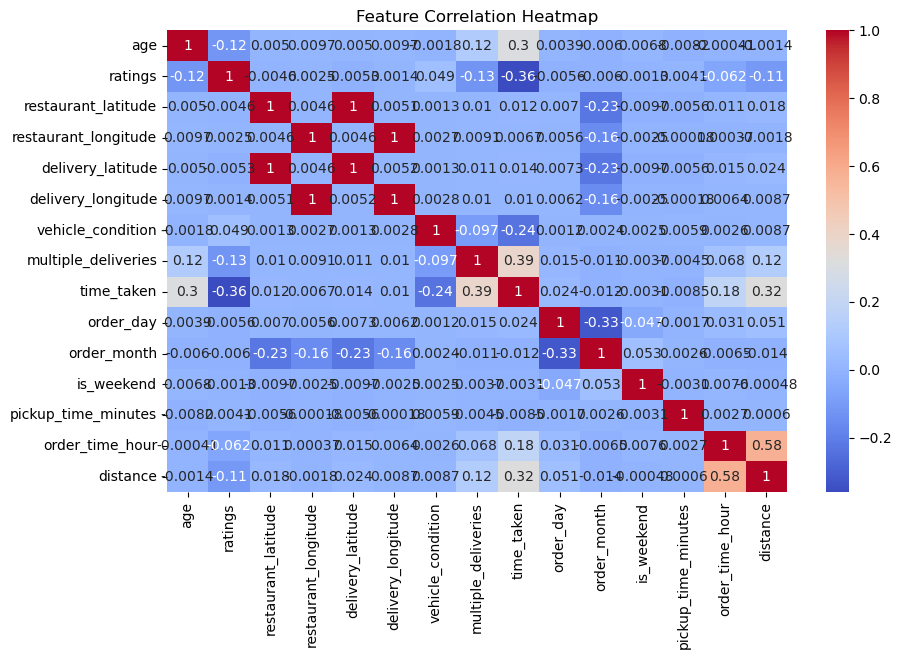

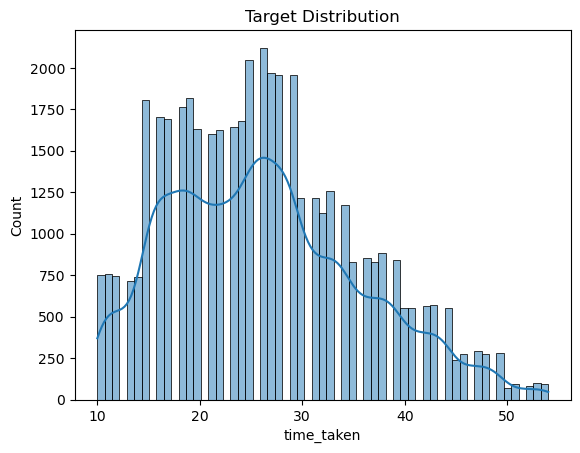


🔹 Linear Regression Results
MSE: 36.50
MAE: 4.81
SMAPE: 19.82%


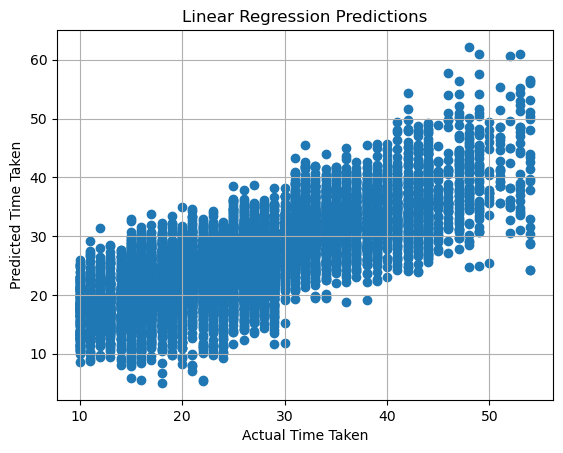

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


#  SMAPE for Regression

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    return np.mean(diff) * 100


#  Load and Clean Data

def load_and_clean(target):
    df = pd.read_csv("swiggy_cleaned.csv")
    df.drop_duplicates(inplace=True)
    df.drop(columns=['rider_id', 'order_date', 'city_name'], errors='ignore', inplace=True)
    df.dropna(subset=[target], inplace=True)
    return df


#  Preprocessing

def preprocess(df, target):
    X = df.drop(columns=[target])
    y = df[target]

    # Encode categoricals
    X = pd.get_dummies(X, drop_first=True)

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#  Visual Diagnostics

def visualize(df, target):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
    plt.title("Feature Correlation Heatmap")
    plt.show()

    sns.histplot(df[target], kde=True)
    plt.title("Target Distribution")
    plt.show()

# Train & Evaluate
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    smape_score = smape(y_test, preds)

    print(f"\n🔹 Linear Regression Results")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"SMAPE: {smape_score:.2f}%")

    plt.scatter(y_test, preds)
    plt.xlabel("Actual Time Taken")
    plt.ylabel("Predicted Time Taken")
    plt.title("Linear Regression Predictions")
    plt.grid(True)
    plt.show()


#  Run Pipeline

def run_pipeline():
    target = "time_taken"
    df = load_and_clean(target)
    visualize(df, target)
    X_train, X_test, y_train, y_test = preprocess(df, target)
    train_and_evaluate(X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    run_pipeline()


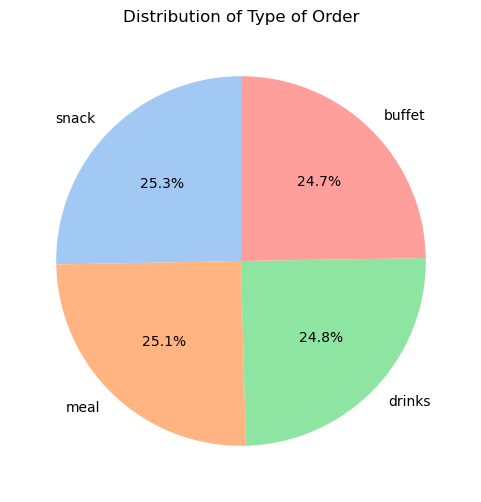

In [21]:
plt.figure(figsize=(6,6))
df['type_of_order'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Distribution of Type of Order")
plt.ylabel("")
plt.show()


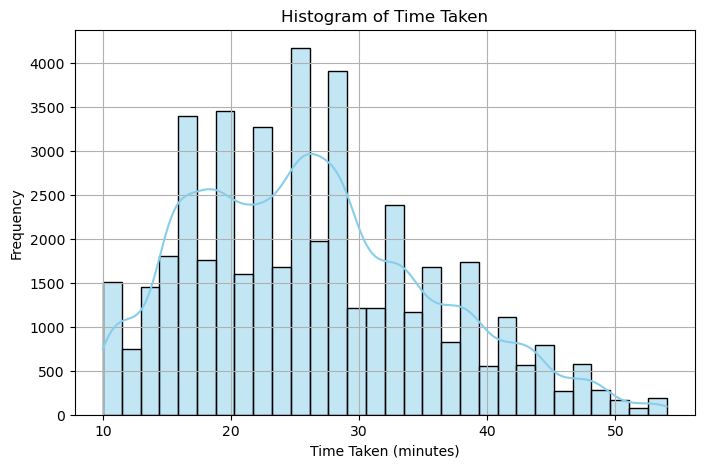

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['time_taken'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Time Taken")
plt.xlabel("Time Taken (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


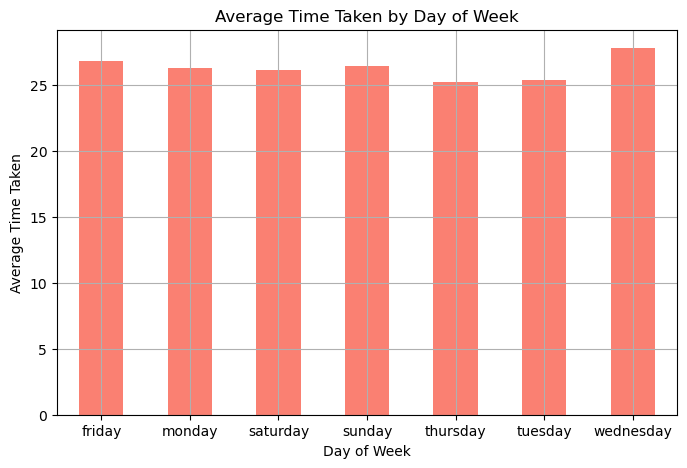

In [23]:
plt.figure(figsize=(8,5))
avg_time = df.groupby('order_day_of_week')['time_taken'].mean().sort_index()
avg_time.plot(kind='bar', color='salmon')
plt.title("Average Time Taken by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Time Taken")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


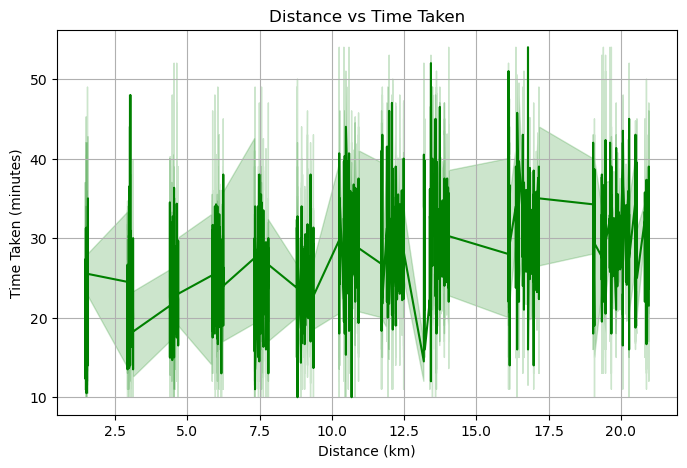

In [24]:
plt.figure(figsize=(8,5))
sns.lineplot(x='distance', y='time_taken', data=df.sort_values('distance'), color='green')
plt.title("Distance vs Time Taken")
plt.xlabel("Distance (km)")
plt.ylabel("Time Taken (minutes)")
plt.grid(True)
plt.show()


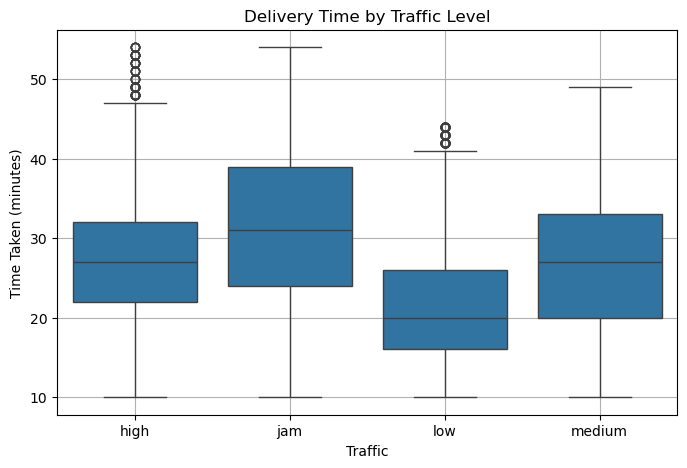

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='traffic', y='time_taken', data=df)
plt.title("Delivery Time by Traffic Level")
plt.xlabel("Traffic")
plt.ylabel("Time Taken (minutes)")
plt.grid(True)
plt.show()


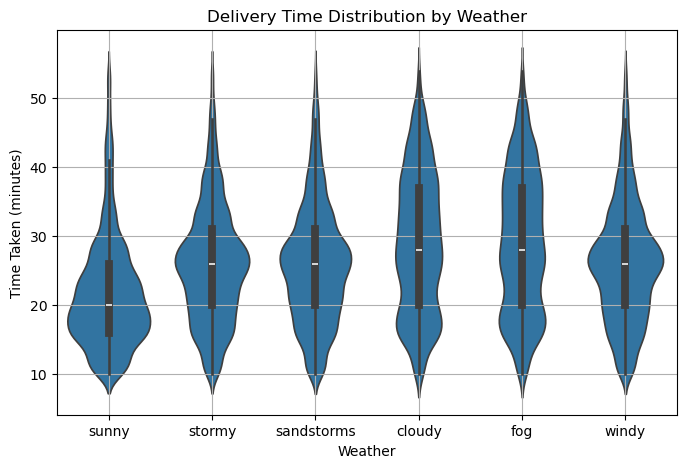

In [26]:
plt.figure(figsize=(8,5))
sns.violinplot(x='weather', y='time_taken', data=df)
plt.title("Delivery Time Distribution by Weather")
plt.xlabel("Weather")
plt.ylabel("Time Taken (minutes)")
plt.grid(True)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15724\1435435927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type_of_vehicle', data=df, palette='Set2')


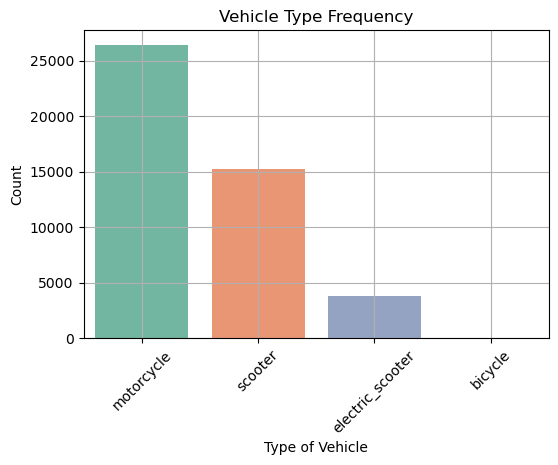

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='type_of_vehicle', data=df, palette='Set2')
plt.title("Vehicle Type Frequency")
plt.xlabel("Type of Vehicle")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


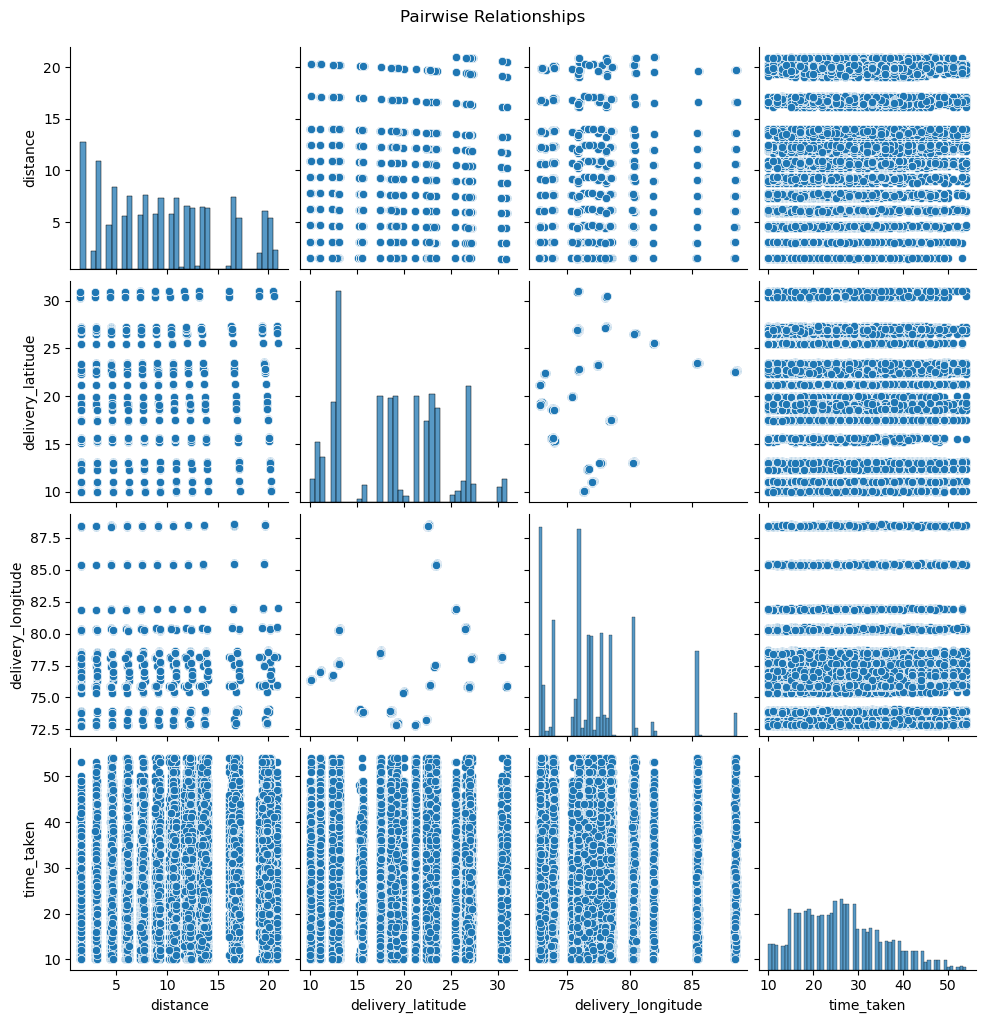

In [28]:
sns.pairplot(df[['distance', 'delivery_latitude', 'delivery_longitude', 'time_taken']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


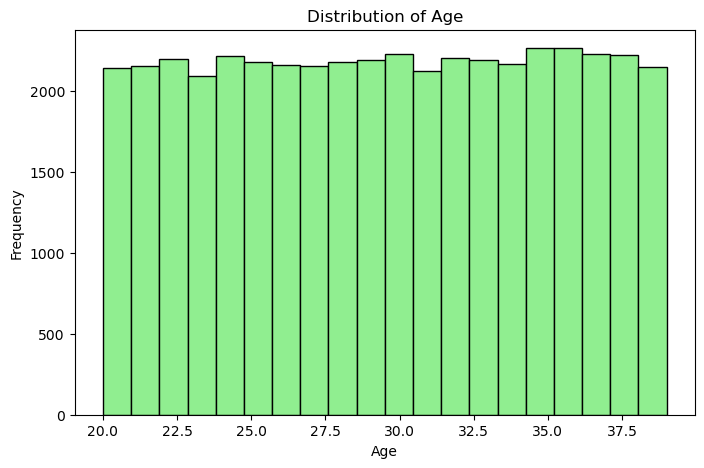

In [43]:
df['age'].plot(
    kind='hist',
    bins=20,                 # number of bins (bars)
    color='lightgreen',      # bar color
    edgecolor='black',       # border color
    figsize=(8,5),           # size of figure
    title='Distribution of Age'
)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

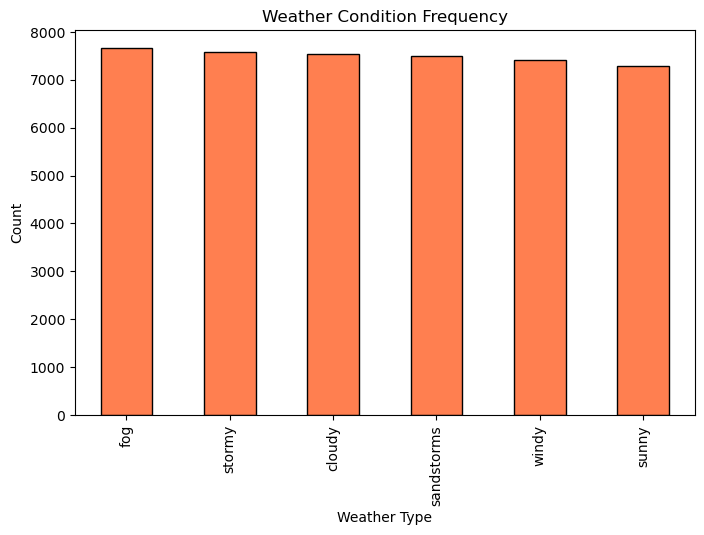

In [45]:
df['weather'].value_counts().plot(
    kind='bar',
    color='coral',           # bar color
    edgecolor='black',       # border color
    figsize=(8,5),           # size of figure
    title='Weather Condition Frequency'
)

plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.show()

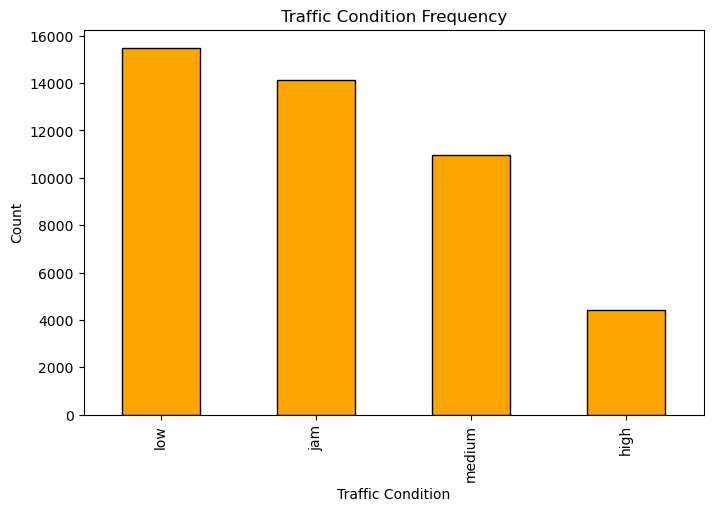

In [46]:
df['traffic'].value_counts().plot(
    kind='bar',
    color='orange',          # bar color
    edgecolor='black',       # border color
    figsize=(8,5),           # figure size
    title='Traffic Condition Frequency'
)

plt.xlabel('Traffic Condition')
plt.ylabel('Count')
plt.show()

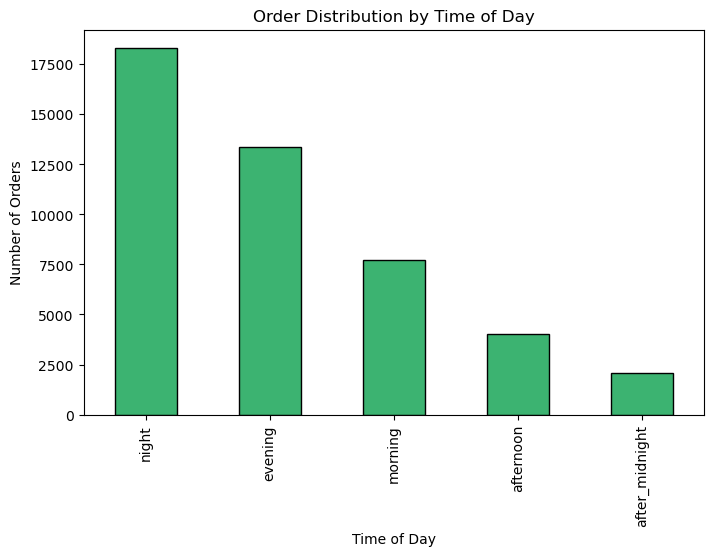

In [47]:
df['order_time_of_day'].value_counts().plot(
    kind='bar',
    color='mediumseagreen',   # bar color
    edgecolor='black',        # border color
    figsize=(8,5),            # figure size
    title='Order Distribution by Time of Day'
)

plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')
plt.show()

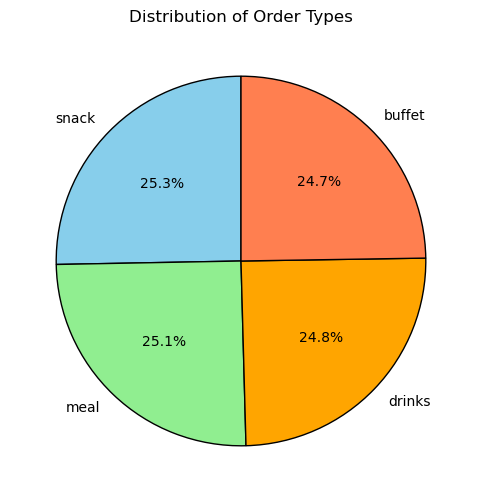

In [48]:
df['type_of_order'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',       # show percentages with 1 decimal
    colors=['skyblue', 'lightgreen', 'orange', 'coral'],  # optional custom colors
    figsize=(6,6),           # make it square for a perfect circle
    title='Distribution of Order Types',
    startangle=90,           # rotate start point
    wedgeprops={'edgecolor':'black'}  # add borders
)

plt.ylabel('')  # removes the default y-axis label
plt.show()

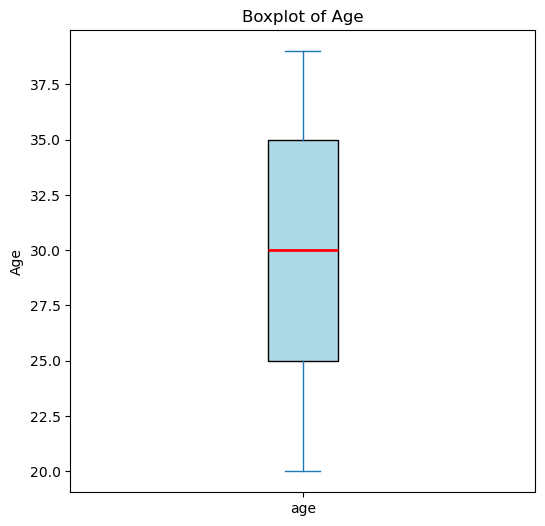

In [49]:
df['age'].plot(
    kind='box',
    vert=True,               # vertical box (default = True)
    patch_artist=True,       # fill with color
    boxprops=dict(facecolor='lightblue', color='black'),  # box color & border
    medianprops=dict(color='red', linewidth=2),            # median line style
    figsize=(6,6),
    title='Boxplot of Age'
)

plt.ylabel('Age')
plt.show()

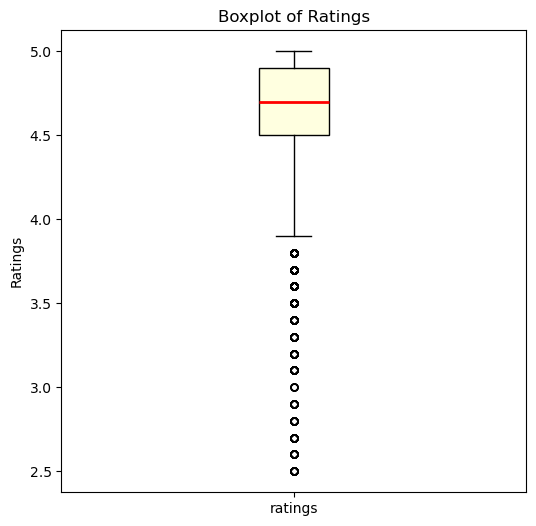

In [75]:
df['ratings'].plot(
    kind='box',
    vert=True,               # vertical box (default)
    patch_artist=True,       # fill the box with color
    boxprops=dict(facecolor='lightyellow', color='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', color='red', markersize=5),
    figsize=(6,6),
    title='Boxplot of Ratings'
)

plt.ylabel('Ratings')
plt.show()

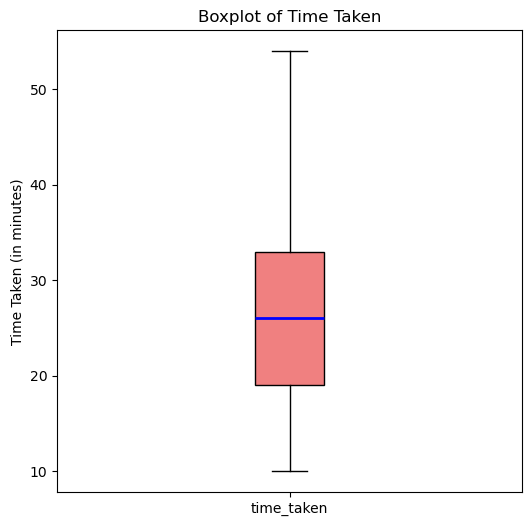

In [76]:
df['time_taken'].plot(
    kind='box',
    vert=True,                # vertical orientation
    patch_artist=True,        # enable color fill
    boxprops=dict(facecolor='lightcoral', color='black'),
    medianprops=dict(color='blue', linewidth=2),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', color='red', markersize=5),
    figsize=(6,6),
    title='Boxplot of Time Taken'
)

plt.ylabel('Time Taken (in minutes)')
plt.show()